# Analysis
---

In [48]:
# dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from matplotlib.dates import DateFormatter
import matplotlib.ticker as mticker
#import seaborn as sns
import scipy.stats as stats

In [2]:
# import cleaned amazon sale report data for consumers
product_sales_df = pd.read_csv("../output/cleaned_Amazon Sale Report.csv")

# display df
product_sales_df

,Order ID,Date,Status,Status (Successful),Fulfilment,ship-service-level,Style,SKU,Category,Size,ASIN,Qty,Amount,ship-city,ship-state,ship-postal-code,promotion-ids
0,405-8078784-5731545,2022-04-30,Cancelled,False,Merchant,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,0,647.62,MUMBAI,MAHARASHTRA,400081.0,NaN
1,171-9198151-1101146,2022-04-30,Delivered,True,Merchant,Standard,JNE3781,JNE3781-KR-XXXL,Kurta,3XL,B09K3WFS32,1,406.00,BENGALURU,KARNATAKA,560085.0,Amazon PLCC Free-Financing Universal Merchant ...
2,403-9615377-8133951,2022-04-30,Cancelled,False,Merchant,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,0,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,NaN
3,406-7807733-3785945,2022-04-30,Delivered,True,Merchant,Standard,JNE3405,JNE3405-KR-S,Kurta,S,B081WX4G4Q,1,399.00,HYDERABAD,TELANGANA,500032.0,Amazon PLCC Free-Financing Universal Merchant ...
4,407-5443024-5233168,2022-04-30,Cancelled,False,Amazon,Expedited,SET200,SET200-KR-NP-A-XXXL,Set,3XL,B08L91ZZXN,0,NaN,HYDERABAD,TELANGANA,500008.0,IN Core Free Shipping 2015/04/08 23-48-5-108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49806,402-0082204-6323568,2022-05-31,Cancelled,False,Amazon,Expedited,JNE3797,JNE3797-KR-A-XL,Western Dress,XL,B09TH3H2DP,1,771.00,Junagadh,Gujarat,362001.0,NaN
49807,408-9803724-6565965,2022-05-31,Cancelled,False,Amazon,Expedited,MEN5024,MEN5024-KR-L,Kurta,L,B08YYSQJTC,1,665.00,MUMBAI,MAHARASHTRA,400056.0,NaN
49808,408-5154281-4593912,2022-05-31,Cancelled,False,Amazon,Expedited,J0119,J0119-TP-XXXL,Top,3XL,B08RYPRVPV,1,574.00,Prayagraj (ALLAHABAD),UTTAR PRADESH,211007.0,NaN
49809,404-5182288-1653947,2022-05-31,Cancelled,False,Amazon,Expedited,JNE3638,JNE3638-KR-XS,Kurta,XS,B09814Q3QH,0,NaN,Kolkata,WEST BENGAL,700040.0,NaN


## Date Setup

#### Look into date column

In [3]:
# set pandas option to show all rows
pd.set_option('display.max_rows', None)

In [4]:
# list all dates with count values
product_sales_df['Date'].value_counts()

Date
2022-04-25    857
2022-04-24    844
2022-04-20    820
2022-04-19    803
2022-04-17    793
2022-04-16    793
2022-04-26    771
2022-04-27    767
2022-04-23    760
2022-05-15    755
2022-04-21    737
2022-05-03    712
2022-05-02    710
2022-04-18    709
2022-04-15    704
2022-04-22    702
2022-04-14    698
2022-04-11    695
2022-05-04    674
2022-04-10    669
2022-05-18    658
2022-05-14    650
2022-04-28    641
2022-04-13    640
2022-05-17    636
2022-04-12    632
2022-05-16    625
2022-05-08    624
2022-05-07    614
2022-05-10    585
2022-05-09    583
2022-05-19    583
2022-04-07    579
2022-05-11    577
2022-04-09    575
2022-04-08    575
2022-04-03    572
2022-05-20    569
2022-05-01    563
2022-05-13    559
2022-06-08    553
2022-06-07    551
2022-04-06    546
2022-06-12    544
2022-06-01    541
2022-04-05    537
2022-06-21    530
2022-06-09    529
2022-06-06    526
2022-04-30    524
2022-05-21    522
2022-05-22    519
2022-06-02    518
2022-05-12    518
2022-04-02    514
2022-

In [5]:
# set pandas option to not show all rows
pd.reset_option('display.max_rows')

In [6]:
# find max and min dates
print(f"Min Date: {product_sales_df['Date'].min()}")
print(f"Max Date: {product_sales_df['Date'].max()}")

Min Date: 2022-04-01
Max Date: 2022-06-29


In [7]:
# convert date column to datetime datatype
product_sales_df = product_sales_df.copy()
product_sales_df['Date'] = pd.to_datetime(product_sales_df['Date'])

#### Aggregate data by date

In [8]:
# groupby date to get daily totals
daily_counts = product_sales_df.groupby('Date').size()

# groupby date for daily revenue
daily_revenue = product_sales_df.groupby('Date')['Amount'].sum()

In [9]:
# get weekly totals and revenue
weekly_counts = daily_counts.resample('W').sum()
weekly_revenue = daily_revenue.resample('W').sum()

In [10]:
# get monthly totals and revenue
monthly_counts = daily_counts.resample('ME').sum()
monthly_revenue = daily_revenue.resample('ME').sum()

#### Aggregate data by day of the week

In [11]:
# add day of the week column
product_sales_df['Day'] = product_sales_df['Date'].dt.day_name()

In [12]:
# get week day counts and revenue
day_counts = product_sales_df['Day'].value_counts()

day_revenue = product_sales_df.groupby('Day')['Amount'].sum()

## Trend Analysis Over Time
---

#### Daily Trend

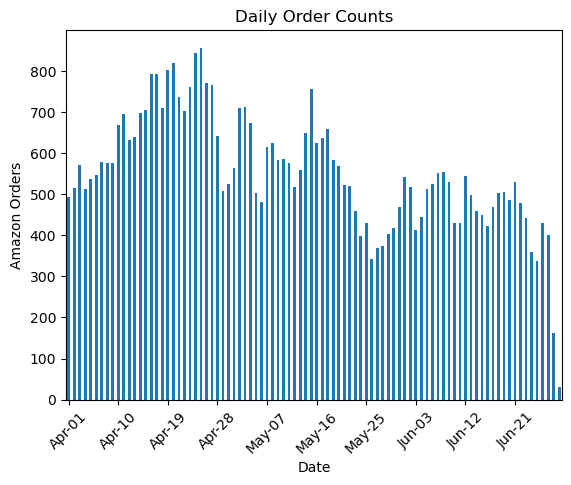

In [13]:
# plot daily order counts
daily_count_plt = daily_counts.plot(kind='bar', title='Daily Order Counts', 
                                     ylabel='Amazon Orders', rot=45)

# format xticks
daily_count_plt.set_xticklabels(daily_counts.index.strftime('%b-%d'))
plt.locator_params(axis='x', nbins=10)

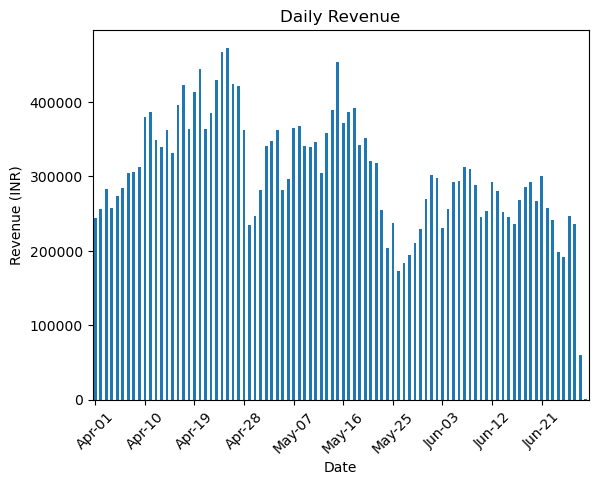

In [14]:
# plot daily order counts
daily_rev_plt = daily_revenue.plot(kind='bar', title='Daily Revenue', 
                                     ylabel='Revenue (INR)', rot=45)

# format xticks
daily_rev_plt.set_xticklabels(daily_revenue.index.strftime('%b-%d'))
plt.locator_params(axis='x', nbins=10)

#### Weekly Trend

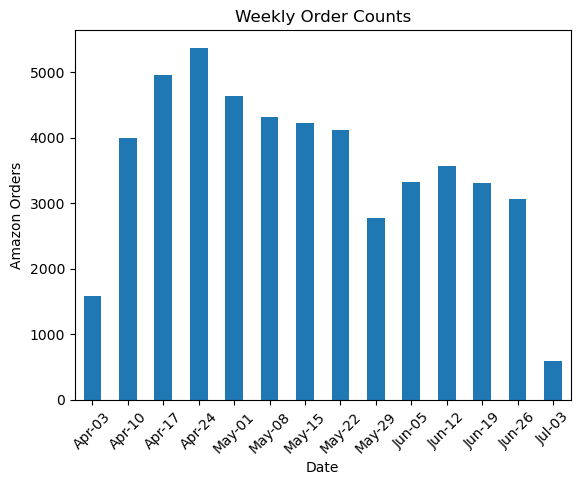

In [15]:
# plot weekly order counts
week_cnt_plt = weekly_counts.plot(kind='bar', title='Weekly Order Counts',
                                  ylabel='Amazon Orders', rot=45)

# format xticks
week_cnt_plt.set_xticklabels(weekly_counts.index.strftime('%b-%d'))

# show plot
plt.show()

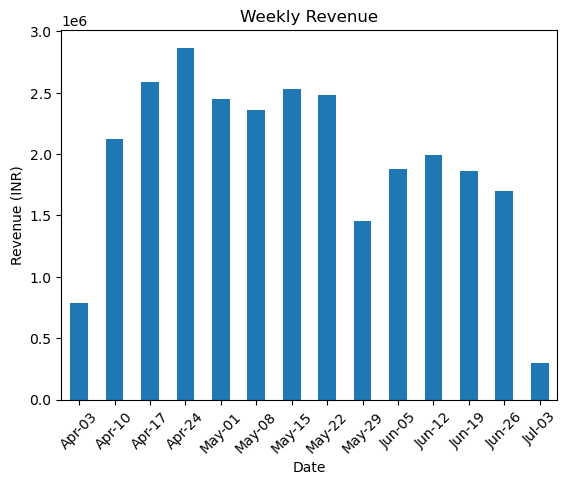

In [29]:
# plot weekly revenue
week_rev_plt = weekly_revenue.plot(kind='bar', title='Weekly Revenue',
                                  ylabel='Revenue (INR)', rot=45)

# format xticks
week_rev_plt.set_xticklabels(weekly_revenue.index.strftime('%b-%d'))

# show plot
plt.show()

#### Monthly Trend

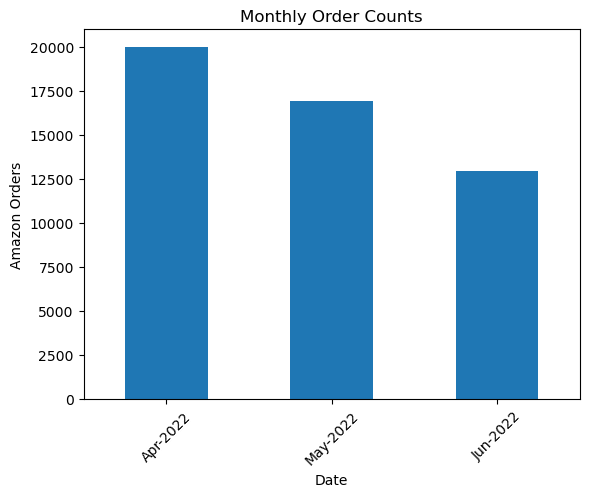

In [16]:
# plot monthly order counts
month_cnt_plt = monthly_counts.plot(kind='bar', title='Monthly Order Counts',
                                    ylabel='Amazon Orders', rot=45)

# format xticks
month_cnt_plt.set_xticklabels(monthly_counts.index.strftime('%b-%Y'))

# show plot
plt.show()

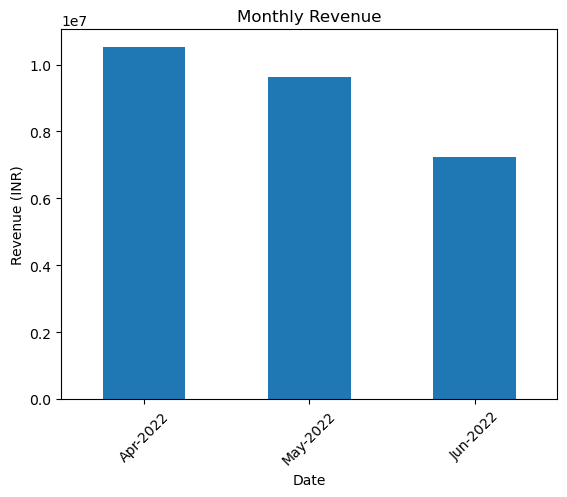

In [17]:
# plot monthly revenue
month_rev_plt = monthly_revenue.plot(kind='bar', title='Monthly Revenue',
                                    ylabel='Revenue (INR)', rot=45)

# format xticks
month_rev_plt.set_xticklabels(monthly_revenue.index.strftime('%b-%Y'))

# show plot
plt.show()

## ANOVA
---

## Determine if there is a statistical significant difference in average revenue or total orders over time.

## Trend Analysis Over Time: Include Status
---

#### Aggregate Data: Day, Week, Month

In [18]:
# add date col as index
product_sales_df.set_index('Date', inplace=True)

In [19]:
# define function to aggregate data
def aggregate_sales(df, freq):
    aggregated = df.groupby([pd.Grouper(freq=freq), 'Status']).agg(
        Orders=('Order ID', 'count'),
        Revenue=('Amount', 'sum')
    ).reset_index()
    return aggregated

In [20]:
# aggregate for daily, weekly, and monthly frequencies
daily_agg = aggregate_sales(product_sales_df, 'D')
weekly_agg = aggregate_sales(product_sales_df, 'W')
monthly_agg = aggregate_sales(product_sales_df, 'ME')

#### Aggregate Data: Day of the Week

In [32]:
# aggregate data for week day
weekday_agg = product_sales_df.groupby(['Day', 'Status']).agg(
    Orders=('Order ID', 'count'),
    Revenue=('Amount', 'sum')
).reset_index()

In [37]:
# sort weekday order from Mon-Sun
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_agg['Day'] = pd.Categorical(weekday_agg['Day'], categories=weekday_order, ordered=True)
weekday_agg = weekday_agg.sort_values('Day')

#### Visualizations: Revenue

In [21]:
# define function to plot revenue
def plot_revenue_aggregated(data, time_frame):
    
    # pivot data for visualzation
    pivot_data = data.pivot(index='Date', columns='Status', values='Revenue').fillna(0)

    # reorder Status values for desired stacking order
    stack_order = ['Delivered', 'Cancelled', 'RTS (Return to Seller)']
    pivot_data = pivot_data[stack_order]

    # create the plot
    rev_plt = pivot_data.plot(kind='bar', stacked=True, color={
        'Delivered': 'green',
        'Cancelled': 'red',
        'RTS (Return to Seller)': 'orange'
    })

    # format yaxis to display full numbers with commas
    rev_plt.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

    # format xticks based on time frame
    if time_frame == 'Daily':
        rev_plt.set_xticklabels(pivot_data.index.strftime('%b-%d'))
        plt.locator_params(axis='x', nbins=10)
    elif time_frame == 'Weekly':
        rev_plt.set_xticklabels(pivot_data.index.strftime('%b-%d'))
    elif time_frame == 'Monthly':
        rev_plt.set_xticklabels(pivot_data.index.strftime('%b-%Y'))
    

    # customize formatting
    plt.title(f'Total Revenue by Status Over Time ({time_frame})')
    plt.xlabel('Date')
    plt.ylabel('Revenue (INR)')
    plt.xticks(rotation=45)
    plt.legend(title='Status')
    plt.tight_layout()
    
    # show plot
    plt.show()

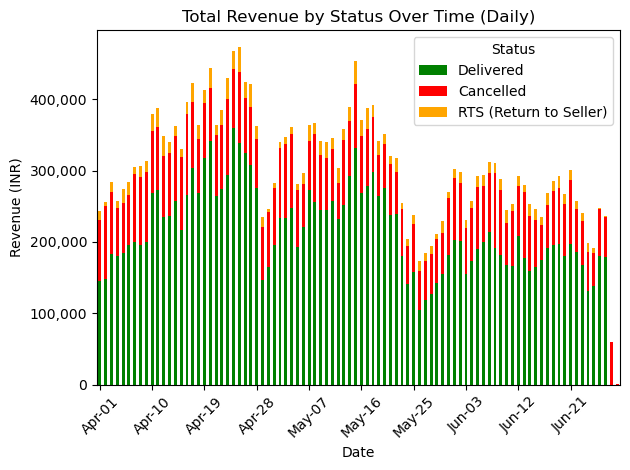

In [22]:
# plot daily revenue by status
plot_revenue_aggregated(daily_agg, 'Daily')

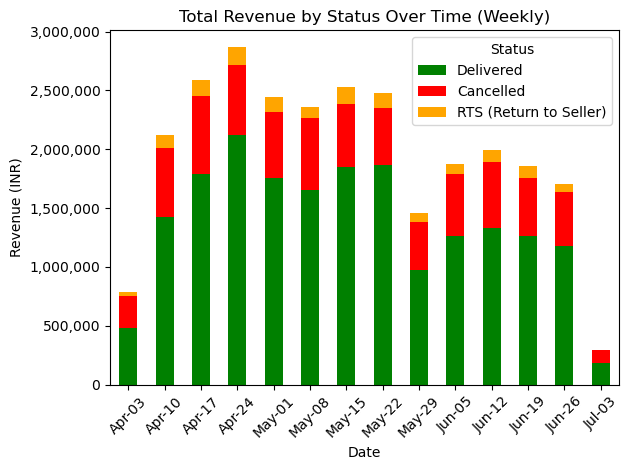

In [23]:
# plot weekly revenue by status
plot_revenue_aggregated(weekly_agg, 'Weekly')

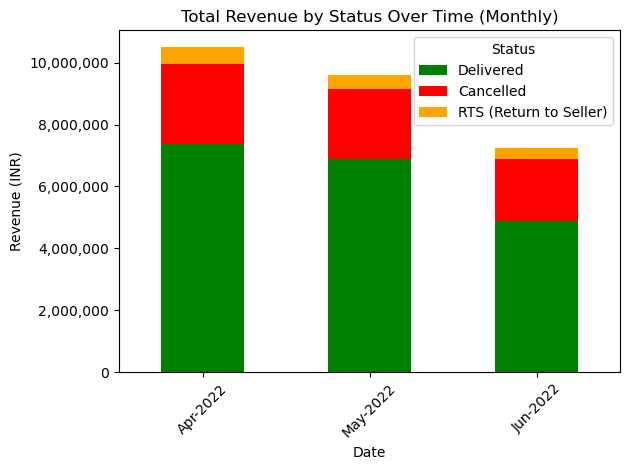

In [24]:
# plot monthly revenue by status
plot_revenue_aggregated(monthly_agg, 'Monthly')

#### Visualizations: Order Count

In [25]:
# define function to plot order count
def plot_count_aggregated(data, time_frame):
    
    # pivot data for visualzation
    pivot_data = data.pivot(index='Date', columns='Status', values='Orders').fillna(0)

    # reorder Status values for desired stacking order
    stack_order = ['Delivered', 'Cancelled', 'RTS (Return to Seller)']
    pivot_data = pivot_data[stack_order]

    # create the plot
    cnt_plt = pivot_data.plot(kind='bar', stacked=True, color={
        'Delivered': 'green',
        'Cancelled': 'red',
        'RTS (Return to Seller)': 'orange'
    })

    # format yaxis to display full numbers with commas
    cnt_plt.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

    # format xticks based on time frame
    if time_frame == 'Daily':
        cnt_plt.set_xticklabels(pivot_data.index.strftime('%b-%d'))
        plt.locator_params(axis='x', nbins=10)
    elif time_frame == 'Weekly':
        cnt_plt.set_xticklabels(pivot_data.index.strftime('%b-%d'))
    elif time_frame == 'Monthly':
        cnt_plt.set_xticklabels(pivot_data.index.strftime('%b-%Y'))
    

    # customize formatting
    plt.title(f'Total Orders by Status Over Time ({time_frame})')
    plt.xlabel('Date')
    plt.ylabel('Orders')
    plt.xticks(rotation=45)
    plt.legend(title='Status')
    plt.tight_layout()
    
    # show plot
    plt.show()

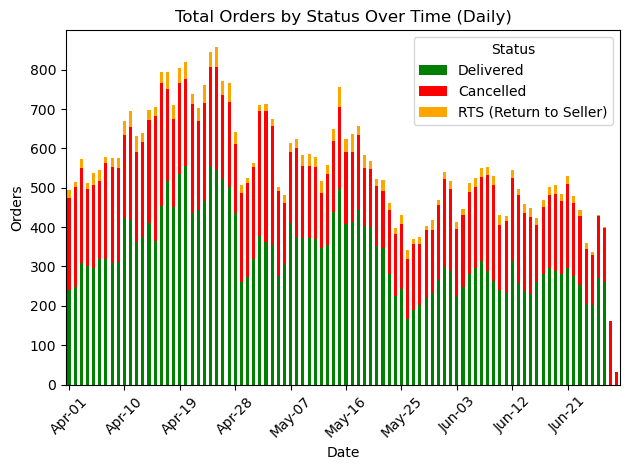

In [26]:
# plot daily order counts
plot_count_aggregated(daily_agg, 'Daily')

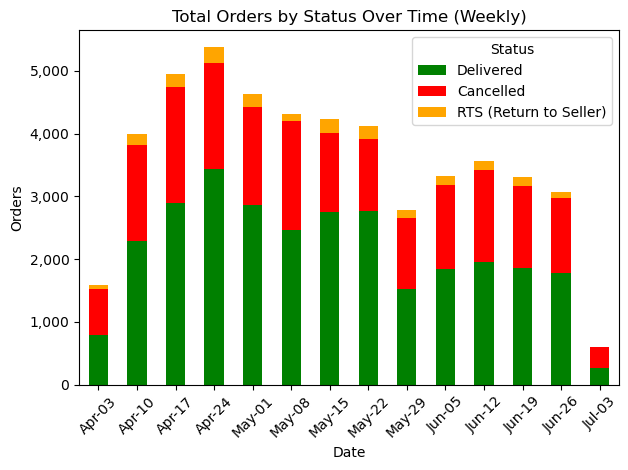

In [27]:
# plot weekly order counts
plot_count_aggregated(weekly_agg, 'Weekly')

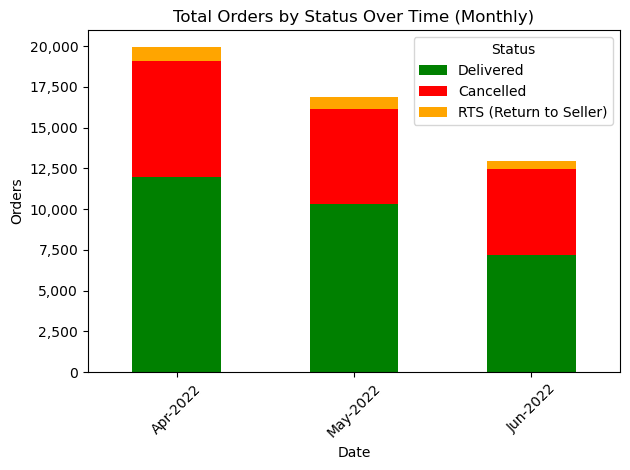

In [28]:
# plot monthly order counts
plot_count_aggregated(monthly_agg, 'Monthly')

#### Visualizations: Weekday

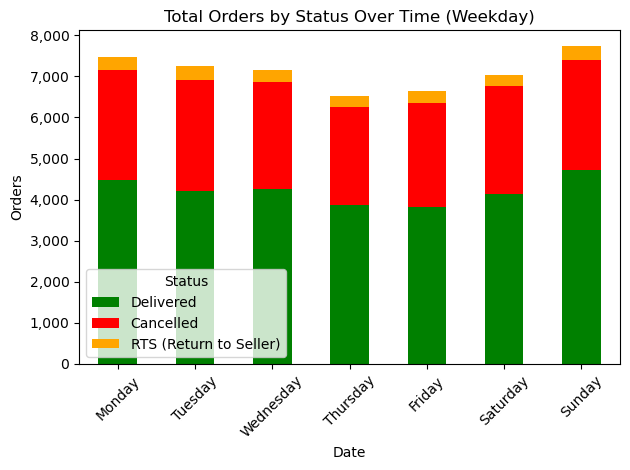

In [40]:
# pivot data for total orders visualzation
pivot_data = weekday_agg.pivot(index='Day', columns='Status', values='Orders').fillna(0)

# reorder Status values for desired stacking order
stack_order = ['Delivered', 'Cancelled', 'RTS (Return to Seller)']
pivot_data = pivot_data[stack_order]

# create the plot
cnt_plt = pivot_data.plot(kind='bar', stacked=True, color={
    'Delivered': 'green',
    'Cancelled': 'red',
    'RTS (Return to Seller)': 'orange'})

# format yaxis to display full numbers with commas
cnt_plt.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

# customize formatting
plt.title(f'Total Orders by Status Over Time (Weekday)')
plt.xlabel('Date')
plt.ylabel('Orders')
plt.xticks(rotation=45)
plt.legend(title='Status')
plt.tight_layout()

# show plot
plt.show()

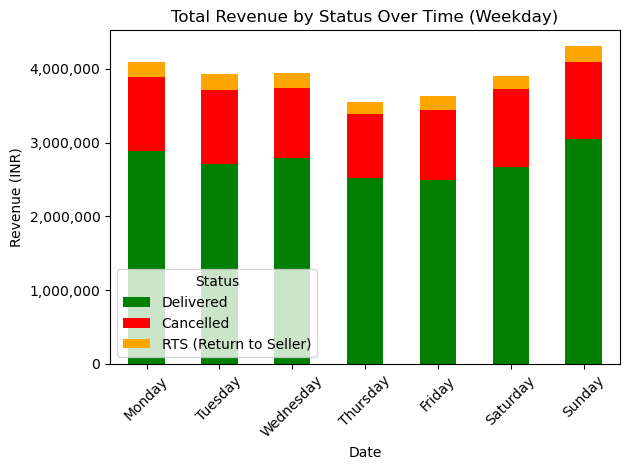

In [43]:
# pivot data for total orders visualzation
pivot_data = weekday_agg.pivot(index='Day', columns='Status', values='Revenue').fillna(0)

# reorder Status values for desired stacking order
stack_order = ['Delivered', 'Cancelled', 'RTS (Return to Seller)']
pivot_data = pivot_data[stack_order]

# create the plot
rev_plt = pivot_data.plot(kind='bar', stacked=True, color={
    'Delivered': 'green',
    'Cancelled': 'red',
    'RTS (Return to Seller)': 'orange'})

# format yaxis to display full numbers with commas
rev_plt.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

# customize formatting
plt.title(f'Total Revenue by Status Over Time (Weekday)')
plt.xlabel('Date')
plt.ylabel('Revenue (INR)')
plt.xticks(rotation=45)
plt.legend(title='Status')
plt.tight_layout()

# show plot
plt.show()

## Chi-Squared Test of Independence
---

## Determine if there is a relationship between order status and time--> does order status vary across different time periods?

In [102]:
# define function to perform chi-square test
def chi2_test(data_agg, index, values):

    # create contingency table of order status by time and share results
    contingency_table = data_agg.pivot(index=index, columns='Status', values=values)
    print("Observed Frequencies:")
    print(contingency_table)
    print("--------------------------------------------------------")
    print("--------------------------------------------------------")

    # perform chi-square test
    chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

    # print results
    print(f"Chi-Square Statistic: {chi2_stat}")
    print(f"P-value: {p_value}")
    print(f"Degrees of Freedom: {dof}")
    print("Expected Frequencies Table:")
    print(expected)
    print("--------------------------------------------------------")
    print("--------------------------------------------------------")

    # convert observed and expected values to dataframes for comparison
    observed_df = contingency_table
    expected_df = pd.DataFrame(expected, index=observed_df.index, columns=observed_df.columns)

    # calculate order difference and percentage difference
    order_diff = observed_df - expected_df
    percentage_diff = ((observed_df - expected_df) / expected_df) * 100

    # print difference tables
    print("Order Count: Observed - Expected".upper())
    print(order_diff)
    print("--------------------------------------------------------")
    print("% Difference between Observed & Expected Orders".upper())
    print(percentage_diff)



#### Monthly

In [103]:
chi2_test(monthly_agg, 'Date', 'Orders')

Observed Frequencies:
Status      Cancelled  Delivered  RTS (Return to Seller)
Date                                                    
2022-04-30       7112      11961                     898
2022-05-31       5843      10327                     715
2022-06-30       5285       7184                     486
--------------------------------------------------------
--------------------------------------------------------
Chi-Square Statistic: 139.63088079806903
P-value: 3.3858478898610325e-29
Degrees of Freedom: 4
Expected Frequencies Table:
[[ 7313.06418261 11816.37212664   841.56369075]
 [ 6183.0198149   9990.4583325    711.5218526 ]
 [ 4743.91600249  7665.16954086   545.91445665]]
--------------------------------------------------------
--------------------------------------------------------
ORDER COUNT: OBSERVED - EXPECTED
Status       Cancelled   Delivered  RTS (Return to Seller)
Date                                                      
2022-04-30 -201.064183  144.627873            

### Monthly Analysis: (over how order status varies across different months)

- **P-value:** very low value (smaller than a = 0.05) indicating that relationship between order status (Delivered, Cancelled, or RTS) and month is statistically significant--> therefore, the distribution of statuses is not uniform over time.
- **Chic-Square Statistic:** (magnitude of the difference between observed and expected frequencies)
- **Observed vs. Expected Frequencies:**
    - April: overall strong sales month but performed about as expected; however, did experience about 56 more returned orders than expected.
    - May: strongest delivery perforamance (better than expected). Performed better than expected for deliveries (337 orders more) with fewer cancellations than expected (340 orders less).
    - June: performed significantly worse than expected. Had 541 more cancelled orders than expected but 60 less orders returned than expected.


#### Day of Week

In [104]:
chi2_test(weekday_agg, 'Day', 'Orders')

Observed Frequencies:
Status     Cancelled  Delivered  RTS (Return to Seller)
Day                                                    
Monday          2676       4483                     318
Tuesday         2709       4202                     336
Wednesday       2599       4256                     310
Thursday        2386       3858                     269
Friday          2542       3818                     274
Saturday        2636       4139                     265
Sunday          2692       4716                     327
--------------------------------------------------------
--------------------------------------------------------
Chi-Square Statistic: 33.118950835586254
P-value: 0.0009274910031324985
Degrees of Freedom: 12
Expected Frequencies Table:
[[2737.95908534 4423.96546947  315.07544518]
 [2653.73672482 4287.87986589  305.38340929]
 [2623.70962237 4239.36238983  301.92798779]
 [2384.9575395  3853.58928751  274.45317299]
 [2429.26582482 3925.18214852  279.55202666]
 [2577.93660

### Weekday Analysis: (over how order status varies across different weekdays)

- **P-value:** low value (smaller than a = 0.05) indicating strong relationship between order status (Delivered, Cancelled, or RTS) and weekday is statistically significant--> therefore, order status proportions vary across days of the week.
- **Chi-Square Statistic:** (magnitude of the difference between observed and expected frequencies)
- **Observed vs. Expected Frequencies:**
    - Cancellations: 4.6% higher than expected on Fridays (not good), and 5% lower than expected on Sundays (the best).
    - Delivered: successful deliveries are 3% higher than expected on Sundays (the best) and 2.7% lower than expected on Fridays (the worst)
    - RTS (Return to Seller): 10% higher returns on Tuesdays (the worst) and 10.7% less returns on Saturdays (the best).
    - **Overall:** Fridays perform the worst (higher cancellations and lower successful deliveries), and Sundays perform the best (least cancellations and highest delivered proportions).